In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import clear_output

In [2]:
def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return x*(1.0-x)

def ReLU(x):
    return x * (x>0)

def ReLU_derivative(x):
    return 1.0 * (x>0)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1.0-x**2

In [3]:
class NeuralNetwork:
    def __init__(self, x, y, nodes, f1, f2, df1, df2, eta, norm):
        self.f1 = f1
        self.f2 = f2
        self.df1 = df1
        self.df2 = df2
        self.eta = eta
        self.input = x
        self.w1 = np.random.rand(nodes,self.input.shape[1])
        self.w2 = np.random.rand(1,nodes)
        if norm:
            self.w1 = 2*self.w1-1
            self.w2 = 2*self.w2-1
        self.y = y
        self.output = np.zeros(self.y.shape)
    
    def feedforward(self):
        self.layer1 = self.f1(np.dot(self.input, self.w1.T))
        self.output = self.f2(np.dot(self.layer1, self.w2.T))
    
    def backprop(self):
        delta2 = (self.y - self.output) * self.df2(self.output)
        d_w2 = self.eta * np.dot(delta2.T, self.layer1)

        delta1 = self.df1(self.layer1) * np.dot(delta2, self.w2)
        d_w1 = self.eta * np.dot(delta1.T, self.input)

        self.w1 += d_w1
        self.w2 += d_w2
    
    def predict(self,x):
        self.x = x
        self.feedforward()
        print(self.output)

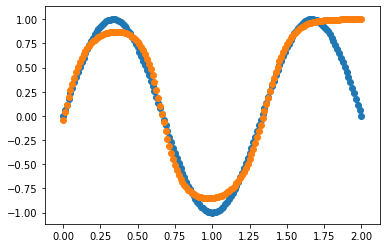

20000 [7.325]


In [4]:
np.set_printoptions(precision=3, suppress=True)

x_label = np.linspace(0,2,161)
x = np.array([[i] for i in x_label])
y = np.sin((3*np.pi/2)*x)
x = np.array([[i,1.0] for i in x_label])

nn = NeuralNetwork(x,y,60,tanh,tanh,tanh_derivative,tanh_derivative,0.001, True)
for i in range(20001):
    if i % 1000 == 0:
        clear_output(wait=True)
        plt.scatter(x_label,y)
        plt.scatter(x_label,nn.output)
        plt.show()
        print(i, sum((nn.output-y)**2))
    nn.feedforward()
    nn.backprop()
#print(nn.output)

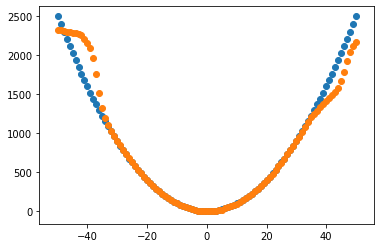

50000 [3103476.156]


KeyboardInterrupt: 

In [5]:
x_label = np.linspace(-50,50,101)
x = np.array([[i] for i in x_label])
y = x**2
x = np.array([[i,1.0] for i in x_label])

nn = NeuralNetwork(x,y,120,sigmoid,ReLU,sigmoid_derivative,ReLU_derivative,0.0000005,True)
for i in range(100001):
    if i % 5000 == 0:
        clear_output(wait=True)
        plt.scatter(x_label,y)
        plt.scatter(x_label,nn.output)
        plt.show()
        print(i, sum((nn.output-y)**2))
    nn.feedforward()
    nn.backprop()
#print(nn.output)